In [11]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def analyze_avg_rouge_scores(data):
    avg_rouge_scores = {
        "tuned": {"rouge-1": [], "rouge-L": []},
        "raw": {"rouge-1": [], "rouge-L": []}
    }

    for item in data:
        for key in avg_rouge_scores.keys():
            avg_rouge_scores[key]["rouge-1"].append(item["rouge_scores"][key]["rouge-1"])
            avg_rouge_scores[key]["rouge-L"].append(item["rouge_scores"][key]["rouge-L"])

    # Calculate the average
    for key in avg_rouge_scores.keys():
        for rouge_key in avg_rouge_scores[key].keys():
            avg_rouge_scores[key][rouge_key] = sum(avg_rouge_scores[key][rouge_key]) / len(avg_rouge_scores[key][rouge_key])

    # Create the visualization
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Average ROUGE-1 scores
    ax[0].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-1"] for key in avg_rouge_scores.keys()], color=['green', 'red'])
    ax[0].set_title('Average ROUGE-1 Scores')
    ax[0].set_ylabel('Average Score')
    ax[0].set_xlabel('Comparison')

    # Average ROUGE-L scores
    ax[1].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-L"] for key in avg_rouge_scores.keys()], color=['purple', 'brown'])
    ax[1].set_title('Average ROUGE-L Scores')
    ax[1].set_ylabel('Average Score')
    ax[1].set_xlabel('Comparison')

    plt.tight_layout()
    plt.show()
    
    return avg_rouge_scores
    
def analyze_rouge_scores(file_path):
    data = load_json(file_path)
    avg_rouge_scores = analyze_avg_rouge_scores(data)
    
    return pd.DataFrame(avg_rouge_scores).T

# model v1 (ATQ×200)

## agri test

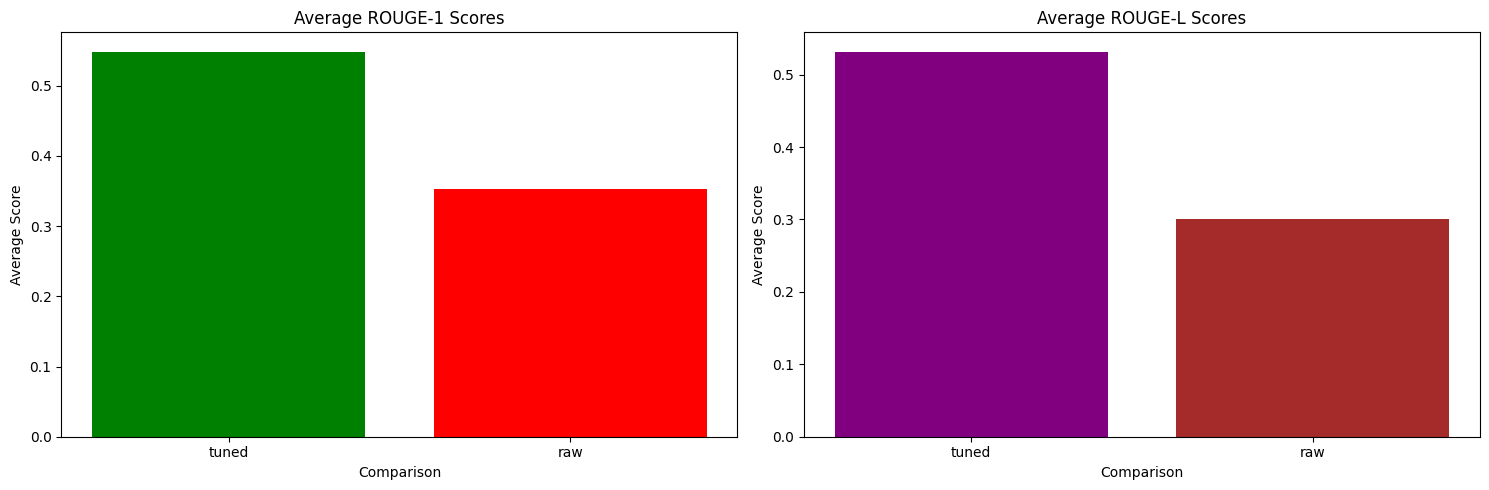

,rouge-1,rouge-L
tuned,0.548627,0.531824
raw,0.352552,0.300359


In [16]:
file_path = "dataset/compare/cleaned/test_compare_v1.json"
analyze_rouge_scores(file_path)

## analysis

In [17]:
data_test = load_json(file_path)

### fine-tuned分數高很多的資料

- 61: fine-tuned完全擷取表格，original先扯了其他東西才開始回答但沒生完
- 11: 兩者都正確，original加了學名
- 7: 題目出不好

In [18]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] - item["rouge_scores"]["raw"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：13，占比：0.18055555555555555


[{'id': 61,
  'document': '環斑病 ：\n|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|病原菌|Gloecercospora sorghi Bain & Edgerton|\n|病原生態|殘存在植物殘渣或土壤中之菌核是本病的第一次感染源，本病亦可以菌絲或菌核形態由種子傳播。菌核發芽後或病斑上所產生之分生胞子堆則藉雨水傳播|\n|危害狀|危害葉片，葉片及葉鞘初形成小型紅褐色水浸狀之斑點，稍後沿葉脈平行方向擴大而呈同心環狀，其顏色亦轉為深紅或黃褐色。病斑上會產生紅色或紫色之分生胞子堆以及黑色菌核。|',
  'question': '高粱的環斑病的危害狀況是什麼？',
  'best_answer': 'raw',
  'answers': {'ground_truth': '環斑病會危害葉片，初形成小型紅褐色水浸狀之斑點，稍後沿葉脈平行方向擴大而呈同心環狀，其顏色亦轉為深紅或黃褐色。病斑上會產生紅色或紫色之分生胞子堆以及黑色菌核。',
   'tuned': '答案:\n環斑病的危害狀況為：\n危害葉片，葉片及葉鞘初形成小型紅褐色水浸狀之斑點，稍後沿葉脈平行方向擴大而呈同心環狀，其顏色亦轉為深紅或黃褐色。病斑上會產生紅色或紫色之分生胞子堆以及黑色菌核。',
   'raw': '根據參考文章中的資訊，高粱的環斑病（Gloeocercospora sorghi）是由病原菌Gloeocercospora sorghi Bain & Edgerton引起的，其生活史包括以下階段：\n\n1. 最初的感染源：病原菌可以存在於植物殘留物或土壤中的菌核。\n2. 種子傳播：透過菌絲或菌核形式，病原菌可以由種子傳播。\n3. 葉片感染：病原菌在葉片上形成小型的紅褐色水浸狀斑點，稍後該斑點會沿葉脈平行方向擴大。\n4. 病斑特徵：病斑上會出現紅色或紫色之分生胞子堆以及黑色菌核。\n\n因此，高粱的環斑病主要危害葉片，造成紅色或紫色之分生胞子堆以及'},
  'rouge_scores': {'tuned': {'rouge-1': 0.8913043428638943,
    'rouge-L': 0.88

### original分數高很多的資料

- 33: 超長表格，fine-tuned是超精簡版正確回答，original整坨丟回來

In [19]:
random.seed(42)
filtered_data = [
    item for item in data_test
    if item["rouge_scores"]["raw"]["rouge-L"] - item["rouge_scores"]["tuned"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：1，占比：0.013888888888888888


[{'id': 33,
  'document': '| 類別 | 資訊 |\n|------|------|\n| 病原菌 | Colletotrichum gloeosporioides Penzig炭疽病除乾燥地區不發病或發病輕微外，普遍發生，在高溫多濕地區尤其嚴重，但臺灣菊花炭疽病發病還算輕微，偶而酷暑時零星發生。|\n| 病徵 |病原菌可由葉尖或葉緣之自然開口侵入，葉片受感染後，會出現針尖狀褪色小斑點，以後病斑逐漸擴大，病斑顏色亦逐漸加深，後期呈同心輪紋狀之紅褐色病斑，病斑處會出現黑褐色至黑色小顆粒，此為病原菌的孢子盤，遇高濕度時會溢出粉紅色至桔紅色粘狀物，乃病原菌之分生孢子堆，多數病斑會癒合成不規則之大病斑，嚴重時造成葉片乾枯、脫落。本病全年均可發生，主要發生在植株較大、通風不良或管理失當時，但以高溫多濕時較為嚴重。初期葉片上產生圓形褪色小斑點，以後病斑逐漸擴大，病斑顏色亦逐漸加深，後期病斑呈褐色，病斑上可見黑褐色至黑色小顆粒，乃病原菌之分生孢子盤，遇高濕度時可溢出粉紅色至桔紅色粘狀物，乃病原菌之分生孢子；多數病斑可互相癒合而成不規則形之大病斑，嚴重時造成葉片乾枯。生育初期幾乎不見本病之發生，但植株較大、通風不良或栽培管理失當時較易發現本病之發生，此時病原菌可由葉緣之自然開口侵入，呈褐色斑點，並向內擴大，造成病斑附近組織變黃，嚴重時易使葉片脫落。 |\n| 病原菌 | 分\u3000\u3000類：\tDeuteromycetes (不完全菌綱)、Melanconiales (黑盤孢目)、Melanconiaceae (黑盤孢科)、Colletotrichum<br>分\u3000\u3000佈：\t分佈範圍可能很廣，但一般發生不嚴重。<br>寄\u3000\u3000主：\t本菌寄主範圍極廣，但是否能互相感染或其致病力仍待證實，據報告已知葉片可被感染者計有虎頭蘭、仙克萊、菊花、非洲菊、朱蕉、美人蕉、萬年青、黛粉葉、黃金葛、變葉木、聖誕紅、海棠、雞冠花、百日草、橡膠樹、茶花、菊花、百合、孤挺花、華八仙花、虎斑木；花瓣被害而造成凋謝者有使君子、秋石斛及龍吐珠；而莖部被害造成枝條枯乾者有銀柳、仙人掌類之曇花及螃蟹蘭亦會被害而導致莖部嚴重凹陷病斑。<br>形\u3000\u3000態：\t分生孢子盤形成於寄主表皮下，成熟後表皮細胞破裂而露出寄主表面，呈盤狀。分

### 兩者分數都很低的資料

- 3: 題目出不好
- 0: gpt:中文名/fine-tuned:學名/original:學名+俗名
- 34: gpt:表格(傳播途徑)/fine-tuned:(發生生態)/original:綜合

In [21]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] < 0.2 and item["rouge_scores"]["raw"]["rouge-L"] < 0.2
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：9，占比：0.125


[{'id': 3,
  'document': '|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|學名|Rattus losea Swinhoe|\n|發生與為害習性 |俗名大卵哥(包)仔，為台灣特有種。分佈於本省平地，發生盛期為7月至10月。每胎平均生產4~5隻仔鼠。為蔗田的重要野鼠之一。主要嚙食節間，殘留皮層，刳入內部呈空洞狀，食穴周圍密佈小形齒痕。嚙食剝落之碎片，較鬼鼠者細小。嚙食蔗芽時，亦係殘留鱗片之一部分而向芽之內部 刳食。|\n|形態 |體型中形。尾呈褐色，約與體同長。雄鼠之腹部末端有膨大睪丸顯露外部，為最明顯之特徵。耳殼反折時達眼之上緣。毛質柔軟，背部之毛多為細長，先端黃褐色，基部石板色；腹部之毛短而柔，呈黃色乃至褐色。前後肢腳掌之背部具黑色縱條。糞粒小形，常呈凹凸或縊形。|',
  'question': '針對小黃腹鼠的防治方法是什麼？',
  'best_answer': None,
  'answers': {'ground_truth': '可以使用藥劑進行防治，施藥方法包括每公頃使用量、稀釋倍數等。',
   'tuned': '答案:\n\n根據參考文章中的資訊，針對小黃腹鼠的防治方法包括：\n\n1. 使用毒餌：小黃腹鼠為台灣特有種，發生盛期為7月至10月，每胎平均生產4~5隻仔鼠，主要嚙食節間，殘留皮層，刳入內部呈空洞狀，食穴周圍密佈小形齒痕。因此，可使用毒餌，如米飯或米麩等，誘殺小黃腹鼠。\n\n2. 防除棲所：小黃腹鼠為蔗田的重要野鼠之一，因此，應防除其棲所，如蔗田附近之樹林或草叢等，避免小黃腹鼠有藏身之地。\n\n3. 加強巡查：定期巡查蔗田，發現小黃腹鼠蹤影時，應立即採取措施，如使用毒餌或捕鼠',
   'raw': '根據參考文章中的資訊，針對小黃腹鼠（Rattus losea）的防治方法可能包括：\n\n1. 使用毒餌：由於小黃腹鼠為台灣特有種，主要分佈於平地，發生盛期為7月至10月，每胎平均生產4~5隻仔鼠，為蔗田的重要野鼠之一。因此，可使用毒餌，如米飯或麩皮等，來誘殺小黃腹鼠。\n2. 設定陷阱：小黃腹鼠為體型中形，尾呈褐色，約與體同長。雄鼠之腹部末端有膨大睪丸顯露外部

### 兩者分數都很高的資料

test data中沒有兩個分數都高於0.8的

In [22]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] > 0.8 and item["rouge_scores"]["raw"]["rouge-L"] > 0.8
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：0，占比：0.0


[]

- 13: 問學名的
- 57: 整格截取，fine-tuned只回表格內容，original會順過句子

In [23]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] > 0.7 and item["rouge_scores"]["raw"]["rouge-L"] > 0.7
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：2，占比：0.027777777777777776


[{'id': 13,
  'document': '| 類別 | 資訊 |\n|------|------|\n| 病原菌 | Fulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱) |\n| 病徵 | 主要發生於葉、莖、花及幼果亦可被害。初期病徵葉背面呈現不明顯之灰白色小斑點。在潮濕環境下，這些病斑之下表面著生紫褐色之黴狀物。病斑初呈圓形，後因葉脈阻止呈不正形，表面呈淡黃色，背面轉為黃褐色至灰紫色，後期葉捲而枯死。|\n| 病原生態 | 當溫度18～26℃，溼度高達90～100％時最易發生。分生孢子自葉背病斑產生後，隨氣流或雨水接觸而傳播，有時亦可附在種子上。 |',
  'question': '番茄葉黴病的病原菌是什麼？',
  'best_answer': 'raw',
  'answers': {'ground_truth': 'Fulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱)',
   'tuned': '答案:\nFulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱)',
   'raw': '根據參考文章中的資訊，番茄葉黴病的病原菌為Fulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱)。'},
  'rouge_scores': {'tuned': {'rouge-1': 0.9166666617013889,
    'rouge-L': 0.9473684160664821},
   'raw': {'rouge-1': 0.6285714242612246, 'rouge-L': 0.7199999953920001}}},
 {'id': 57,
  'document': '葉燒病 ：\n|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|病原菌|Xanth

# model v2 (ATQ×600)

## agri test

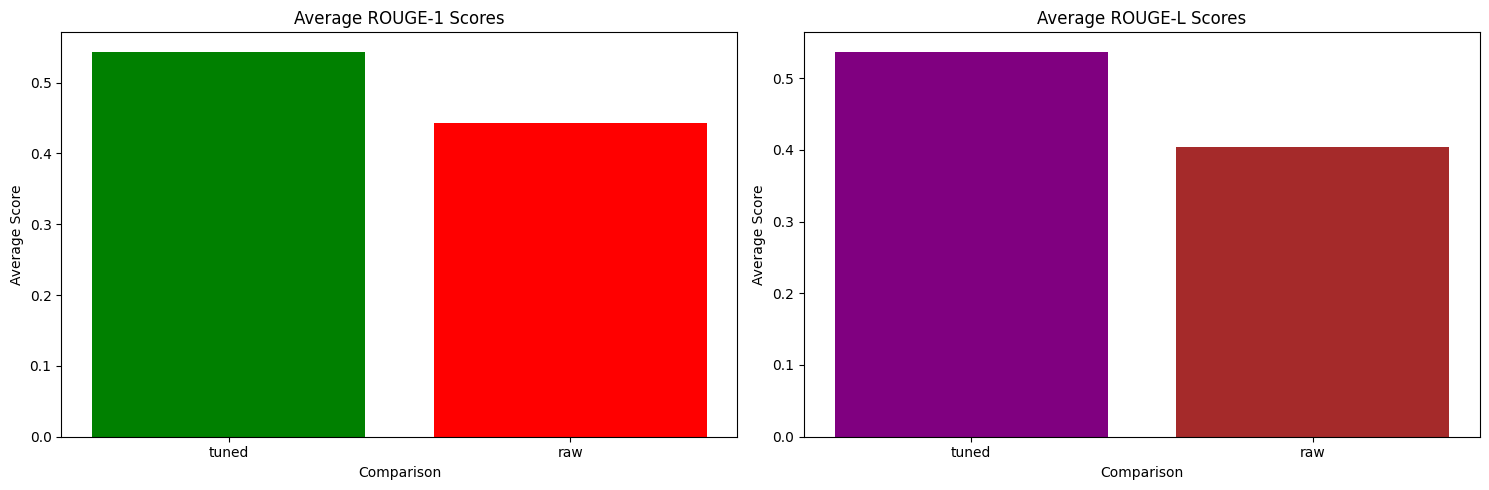

,rouge-1,rouge-L
tuned,0.543735,0.536934
raw,0.442881,0.403711


In [24]:
file_path = "dataset/compare/cleaned/test_compare_v2.json"
analyze_rouge_scores(file_path)

## analysis

In [25]:
data_test = load_json(file_path)

### fine-tuned分數高很多的資料

In [27]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] - item["rouge_scores"]["raw"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：18，占比：0.25


[{'id': 11,
  'document': '|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|學名|Melanotus tamsuyensis Bates|\n|生態習性 |幼蟲期長達2～3年，年中均可發現。成蟲羽化後於11～12月間交尾產卵，黃昏至晚間十時活動最頻繁。完成一代需2～3年，成蟲於10月至次年4月出 現。產卵盛期則在1～3月間，每一雌蟲產卵200～300粒，卵期12～32日。幼蟲期2～3年，年中均可發現，老熟幼蟲於9～12 月間於土中作一扁平蛹室，在內靜止2～3星期後化蛹。蛹期18～31日。成蟲趨光性甚強，白天潛伏在心葉或葉鞘間隙。黃昏後至晚間10時左右活動最為頻繁。幼蟲對土壤濕度之反應敏感，最適活動範圍在15～18％之土壤含水量。一般以微酸性土壤分佈較多，山地紅粘壤土或缺乏灌溉地帶之蔗園亦多分佈。|\n|形態 | 卵：近球形，約0.7x0.5公厘，黃色乃至淡黃色。卵殼上有疣狀突起。幼蟲：初孵化時淡黃色，老熟時赤褐色長30～35公厘。各環狀密佈刻點，前緣有波狀隆起，兩側有新月形暗色斑點。尾節後緣有 5個突起，中央一個最大，兩側 2 個較小。蛹：長16公厘，乳黃白色。前胸背長方形，其前後角及後緣中央各生刺毛。尾節兩側亦各有刺毛一根。成蟲：體長16公厘左右。全身橙黃至暗褐色，密生黃色軟毛。頭部、胸部及翅鞘之背面密佈粗大點刻。觸角絲狀，11節。翅鞘背面有9 條縱列點刻，其間密佈微小刻點。|\n|危害狀|主要危害植株之地下部。本種幼蟲棲息於排水良好之沙質壤土中，為害植株之地下部，威脅竹筍生產。|',
  'question': '櫛叩頭蟲的幼蟲對土壤濕度的最適活動範圍是多少？',
  'best_answer': 'raw',
  'answers': {'ground_truth': '15～18％',
   'tuned': '15～18％',
   'raw': '根據表格顯示，櫛叩頭蟲的幼蟲對土壤濕度的最適活動範圍為15～18％。'},
  'rouge_scores': {'tuned': {'rouge-1': 0.999999995, 'rouge-L': 0.999999995},
   

### original分數高很多的資料

In [28]:
random.seed(42)
filtered_data = [
    item for item in data_test
    if item["rouge_scores"]["raw"]["rouge-L"] - item["rouge_scores"]["tuned"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：8，占比：0.1111111111111111


[{'id': 21,
  'document': '防治方法：\n目前在洋香瓜上尚無推薦藥劑，參考蔬菜上之用藥，防治其它夜盜蟲，同時可收防治之效果：\n噴藥防治時應噴及葉背蟲體棲息處，且宜選擇幾種較佳之藥劑交互作用。\n|藥劑名稱 | 每公頃使用量 | 稀釋倍數(倍) | 施藥方法 | 注意事項\n|:----------------------|:------------|:-----------|:-----------|:---------------------------------------------------|\n24％納乃得溶液(Methomyl) |  | 500 | 擬尺蠖幼蟲發生時，每隔7天施藥一次。 | *納乃得為限制登記使用農藥，不接受擴大作物範圍申請。\n50％達馬松溶液(Methamidophos) |  | 500 | 擬尺蠖幼蟲發生時，每隔7天施藥一次。 | *達馬松為限制登記使用農藥。1.不接受擴大作物範圍申請。2.公告刪除蔬菜類(含包葉菜類及蘆筍)、水稻及小葉菜類之使用方法及範圍。',
  'question': '使用達馬松溶液(Methamidophos)擬尺蠖防治時，有哪些注意事項？',
  'best_answer': 'raw',
  'answers': {'ground_truth': '達馬松為限制登記使用農藥，不接受擴大作物範圍申請。公告刪除蔬菜類、水稻及小葉菜類之使用方法及範圍。',
   'tuned': '24％納乃得溶液(Methomyl)',
   'raw': '根據表格提供的資訊，針對擬尺蠖使用達馬松溶液(Methamidophos)進行防治時，有以下注意事項：\n\n1. 達馬松為限制登記使用農藥，不接受擴大作物範圍申請。\n2. 公告刪除蔬菜類(含包葉菜類及蘆筍)、水稻及小葉菜類之使用方法及範圍。\n\n因此，不可在洋香瓜上使用達馬松溶液(Methamidophos)進行擬尺蠖防治。'},
  'rouge_scores': {'tuned': {'rouge-1': 0.0, 'rouge-L': 0.0},
   'raw': {'rouge-1': 0.6024096343446074, 'rouge-L': 0.5046728934230065}}},
 {'id': 16,


### 兩者分數都很低的資料

In [29]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] < 0.2 and item["rouge_scores"]["raw"]["rouge-L"] < 0.2
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：8，占比：0.1111111111111111


[{'id': 4,
  'document': '防治方法：\n發現成蟲及若蟲時可用手捕捉；防治竹盲椿象之藥劑，亦可同時防治本蟲。\n|藥劑名稱 | 每公頃使用量 | 稀釋倍數(倍) | 施藥方法 | 注意事項 | \n|:----------------------|:------------|:-----------|:-----------|:---------------------------------------------------|\n30%撲芬松乳劑(Fenvalerate + Fenitrothion) | 0.2公升(以300公升施藥量計算) | 1,500 | 每隔15天施藥一次，連續2-3次。 | 1. 採收前18天停止施藥。2.為噴佈使用，若植株太高大，會造成施藥上的困難及不便，最佳施藥時機應在清園留母莖時。3.同一地區以施行共同防治效果較佳，施藥竹林不得採葉。\n20%芬化利乳劑(Fenvalerate) | 0.15公升(以300公升施藥量計算) | 2,000 | 每隔15天施藥一次，連續2-3次。 | 1. 採收前18天停止施藥。2.為噴佈使用，若植株太高大，會造成施藥上的困難及不便，最佳施藥時機應在清園留母莖時。3.同一地區以施行共同防治效果較佳，施藥竹林不得採葉。\n25%滅賜松乳劑(Demeton-S- methyl) |  |  | 1.以原液塗佈於胸高之竹節一圈。2.在竹盲椿象發生猖獗時每隔14天施藥一次。 | 1.採收前5天停止施藥。2.施藥時應戴口罩，工作時間亦不可超過2小時，以策安全。',
  'question': '竹類的害蟲長角緣椿象的防治方法是什麼？',
  'best_answer': 'raw',
  'answers': {'ground_truth': '發現成蟲及若蟲時可用手捕捉；防治竹盲椿象之藥劑，亦可同時防治本蟲。',
   'tuned': '30%撲芬松乳劑(Fenvalerate + Fenitrothion)',
   'raw': '根據表格，對於長角緣椿象(Aphis taiwanensis)的防治方法包括：\n\n1. 手捕捉成蟲及若蟲。\n2. 使用30%撲芬松乳劑(Fenvalerate + Fenitrothion)，每公頃使用量為0.2公升(以300公升施藥量計算)

### 兩者分數都很高的資料

In [30]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["tuned"]["rouge-L"] > 0.8 and item["rouge_scores"]["raw"]["rouge-L"] > 0.8
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：2，占比：0.027777777777777776


[{'id': 14,
  'document': '蔥潛蠅：\n|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|學名|Liriomyza chinensis (Kato)|\n|生態習性|發生10餘世代。本省南部於2月到3月發生較多，成蟲及幼蟲均會為害蔥管，但以幼蟲為主，受害蔥管出現有白條狀食痕。成蟲除將卵產於蔥管內壁或組織外，亦會以產卵管刺破蔥管表皮，以口器吮吸汁液，幼蟲潛食蔥管，自上而下。|\n|形態|卵：橢圓形，乳白色，半透明。幼蟲：成熟幼蟲體長4公厘，乳白至黃色，前後兩端各有一對氣孔突起。 蛹：為圍蛹，橢圓形，淡黃至深褐色，體長2公厘。 成蟲：體長2公厘左右，額黃色，單眼三角區黑色，觸角黃褐色，胸部黑色光澤，肩部至翅基及胸部背方兩側淡黃色，各腹節黃色，翅透明，翅脈黃褐色，(陳文雄、陳昇寬、張煥英。1995。台灣農家要覽農作篇(三)，第386頁。葉瑩編。)|\n|危害狀|被害蔥管呈現白色食痕，偶而為害鱗莖使之腐敗，內留黑色蟲糞，老熟幼蟲於土中化蛹，嚴重危害時蔥管枯萎，全株生長緩慢或萎縮，影響產量。|',
  'question': '蔥潛蠅的學名是什麼？',
  'best_answer': 'equal',
  'answers': {'ground_truth': 'Liriomyza chinensis (Kato)',
   'tuned': 'Liriomyza chinensis (Kato)',
   'raw': ' Liriomyza chinensis (Kato)。'},
  'rouge_scores': {'tuned': {'rouge-1': 0.999999995, 'rouge-L': 0.999999995},
   'raw': {'rouge-1': 0.9090909041322315, 'rouge-L': 0.9090909041322315}}},
 {'id': 56,
  'document': '葉燒病 ：\n|類別|資訊|\n|:--------------------------|:------------------------------------

# model v3 (ATQ×600 + WTQ×1000)

## wiki table test

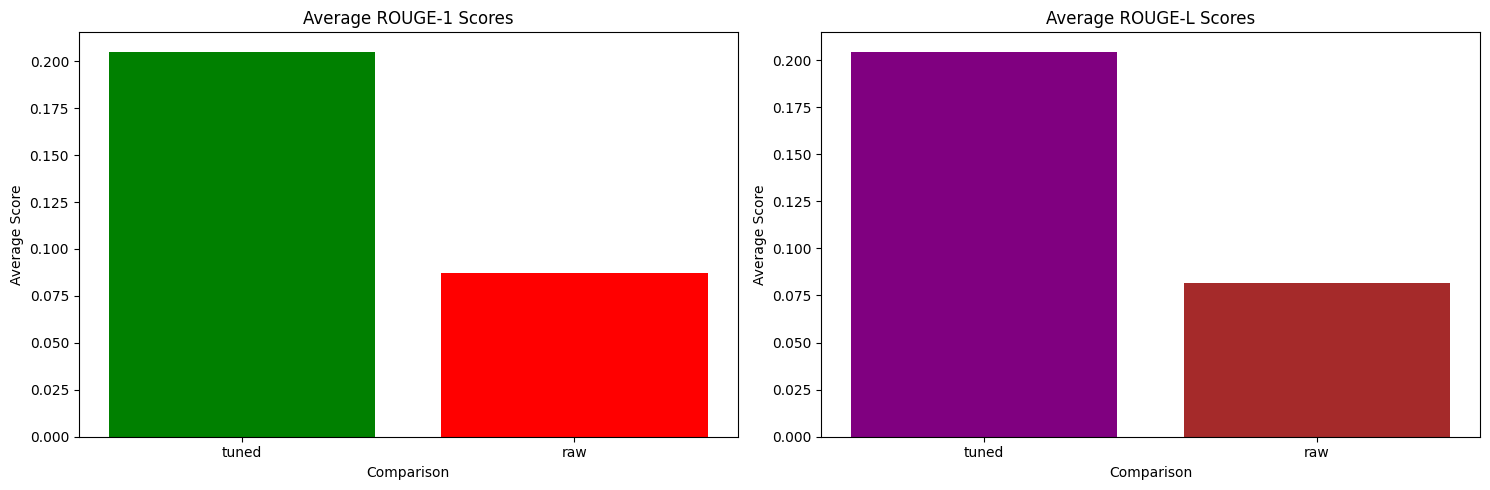

,rouge-1,rouge-L
tuned,0.205159,0.204499
raw,0.087346,0.081664


In [32]:
file_path = "dataset/compare/cleaned/WTQ_compare_v3.json"
analyze_rouge_scores(file_path)

## agri table test

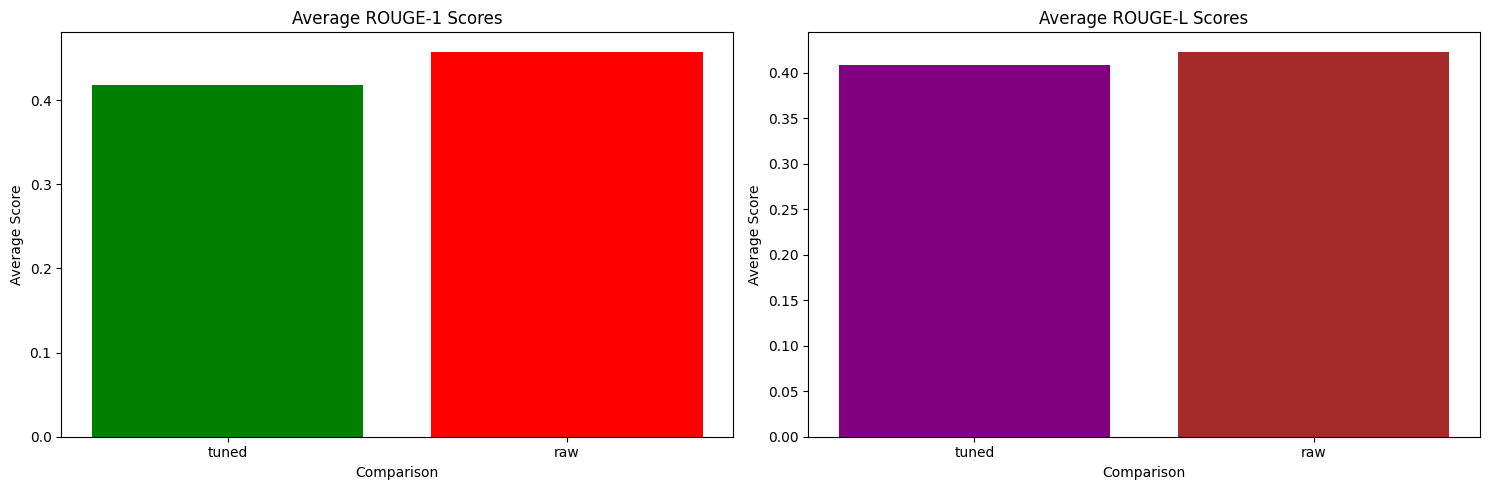

,rouge-1,rouge-L
tuned,0.417649,0.408549
raw,0.457522,0.423190


In [33]:
file_path = "dataset/compare/cleaned/test_compare_v3.json"
analyze_rouge_scores(file_path)

# model v4 (ATQ×600 + prompt v1)

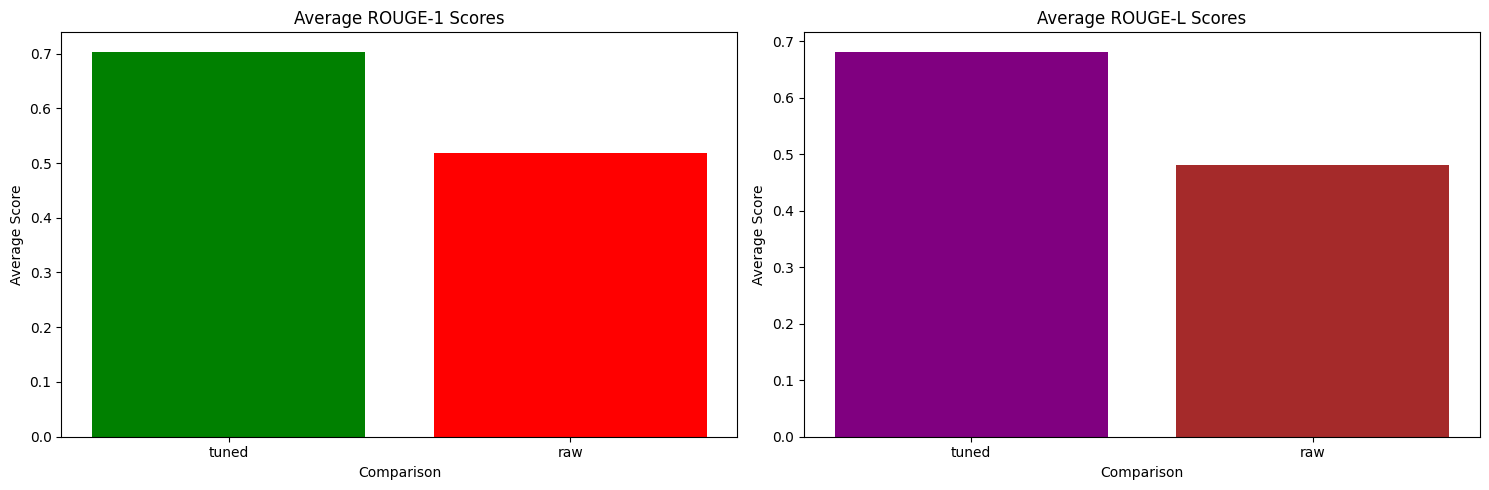

,rouge-1,rouge-L
tuned,0.703511,0.681689
raw,0.518143,0.481227


In [34]:
file_path = "dataset/compare/cleaned/test_compare_v4.json"
analyze_rouge_scores(file_path)

# model v5 (ATQ×600 + prompt v2)

## agri test

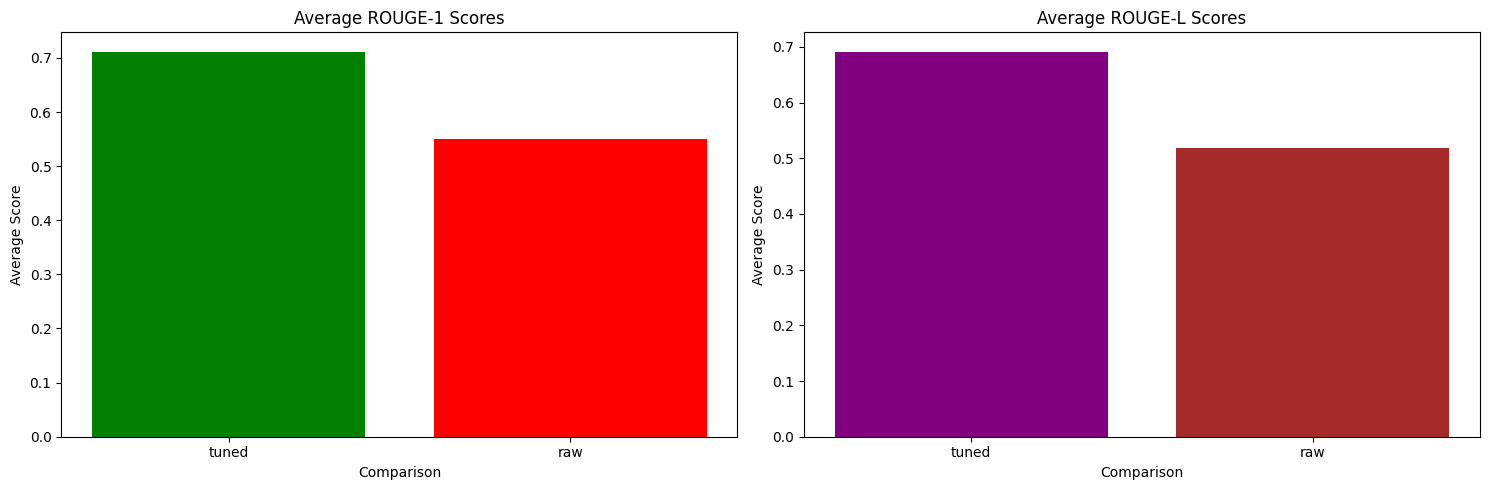

,rouge-1,rouge-L
tuned,0.711691,0.691399
raw,0.549930,0.518712


In [35]:
file_path = "dataset/compare/cleaned/test_compare_v5.json"
analyze_rouge_scores(file_path)

## wiki table test

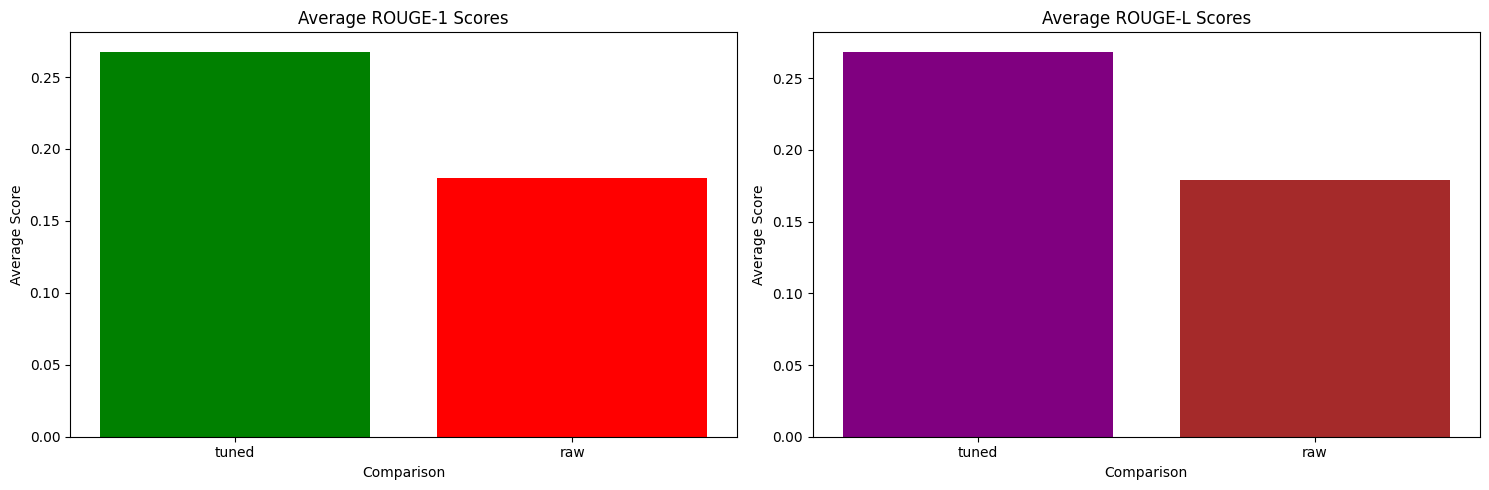

,rouge-1,rouge-L
tuned,0.267661,0.268522
raw,0.179947,0.179040


In [36]:
file_path = "dataset/compare/cleaned/WTQ_compare_v5.json"
analyze_rouge_scores(file_path)